# User params

In [1]:
max_samples = 1_000

In [2]:

import os, sys
sys.path.append(os.path.abspath('../src'))
from src.config import BASE_PATH_DATA, PATH_PROJECT
os.chdir(PATH_PROJECT)

import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

# Loading data

In [3]:
import numpy as np
from src.utils.io.io import load_dataframe
from src.config import BASE_PATH_DATA

# load data
file_path_test_enriched = os.path.join(BASE_PATH_DATA, 'processed', f'df_test_enriched.parquet')
test_df_enriched = load_dataframe(file_path_test_enriched)
test_df_enriched = test_df_enriched.reset_index(drop=True)  # lets reset the index

file_path_train_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_train_encoded.parquet')
file_path_test_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_test_encoded.parquet')
train_df_encoded = load_dataframe(file_path_train_encoded)
test_df_encoded = load_dataframe(file_path_test_encoded)



2024-08-07 16:38:21,055 - src.config - DEBUG - calling load_dataframe
2024-08-07 16:38:21,056 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers


2024-08-07 16:38:21,116 - src.config - DEBUG - calling load_dataframe
2024-08-07 16:38:21,117 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-07 16:38:21,151 - src.config - DEBUG - calling load_dataframe
2024-08-07 16:38:21,152 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers


# Clustering

In [4]:
import pandas as pd
import numpy as np
import hdbscan
import plotly.express as px

# Apply HDBSCAN
X = test_df_encoded.values
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(X)

# Create a DataFrame for easier plotting
df_hdbscan = pd.DataFrame(X, columns=test_df_encoded.columns)
df_hdbscan['Cluster'] = cluster_labels
df_hdbscan['Outlier'] = cluster_labels == -1

# Include relevant columns from test_df_enriched
df_hdbscan['rating'] = test_df_enriched['rating']
df_hdbscan['text_review'] = test_df_enriched['text_review']
df_hdbscan['price'] = test_df_enriched['price']
df_hdbscan['sentiment_score'] = test_df_enriched['sentiment_score']

# Create an interactive plot using Plotly
fig = px.scatter(
    df_hdbscan, 
    x='rating', 
    y='sentiment_score', 
    color='Cluster',
    symbol='Outlier',
    title='HDBSCAN Clustering and Outlier Detection',
    labels={'rating': 'rating', 'sentiment_score': 'sentiment_score'},
    template='plotly_dark',
    hover_data=['rating', 'text_review', 'price', 'sentiment_score']
)

# Customize the plot to highlight outliers
fig.update_traces(marker=dict(size=6, opacity=0.8), selector=dict(mode='markers'))
fig.update_traces(marker=dict(size=8, opacity=1, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(marker_symbol='x'))

# Show the plot
fig.show()


# T-sne vizualization

In [5]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

# Apply t-SNE
X = test_df_encoded
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for easier plotting
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['rating'] = test_df_enriched['rating']
df_tsne['text_review'] = test_df_enriched['text_review']
df_tsne['price'] = test_df_enriched['price']
df_tsne['sentiment_score'] = test_df_enriched['sentiment_score']

# Create an interactive plot using Plotly
fig = px.scatter(
    df_tsne, 
    x='Component 1', 
    y='Component 2', 
    color='rating',
    title='t-SNE Visualization of the Dataset',
    labels={'Component 1': 'Component 1', 'Component 2': 'Component 2'},
    template='plotly_dark',
    hover_data=['rating', 'text_review', 'price', "sentiment_score"]
)

# Show the plot
fig.show()


# Outlier detection with PyOD


In [6]:
import numpy as np
from src.tasks.outliers_and_shift import outlier_shift_prediction

# train and inference
outliers_train, scores_train = outlier_shift_prediction(train_df_encoded, training=True)
outliers_test, scores_test = outlier_shift_prediction(test_df_encoded, training=False) 

# categorize samples
train_scores_inliers = scores_train[outliers_train==0]
train_scores_outliers = scores_train[outliers_train==1]

test_scores_inliers = scores_test[outliers_test==0]
test_scores_outliers = scores_test[outliers_test==1]

# Calculate average outlier scores for train and test sets
average_score_inlier_train = np.mean(train_scores_inliers)
average_score_outlier_train = np.mean(train_scores_outliers)

average_score_inlier_test = np.mean(test_scores_inliers)
average_score_outlier_test = np.mean(test_scores_outliers)


2024-08-07 16:38:33,038 - matplotlib - DEBUG - matplotlib data path: c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\matplotlib\mpl-data
2024-08-07 16:38:33,047 - matplotlib - DEBUG - CONFIGDIR=C:\Users\alexi\.matplotlib
2024-08-07 16:38:33,099 - matplotlib - DEBUG - interactive is False
2024-08-07 16:38:33,100 - matplotlib - DEBUG - platform is win32
2024-08-07 16:38:33,180 - matplotlib - DEBUG - CACHEDIR=C:\Users\alexi\.matplotlib
2024-08-07 16:38:38,746 - datasets - INFO - PyTorch version 2.3.1 available.
2024-08-07 16:38:39,530 - sentence_transformers.SentenceTransformer - INFO - Use pytorch device_name: cpu
2024-08-07 16:38:39,531 - sentence_transformers.SentenceTransformer - INFO - Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2024-08-07 16:38:39,535 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): huggingface.co:443
2024-08-07 16:38:39,911 - urllib3.connectionpool - DEBUG - https://huggingface.

# Visualizations

2024-08-07 16:38:43,410 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-07 16:38:43,414 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


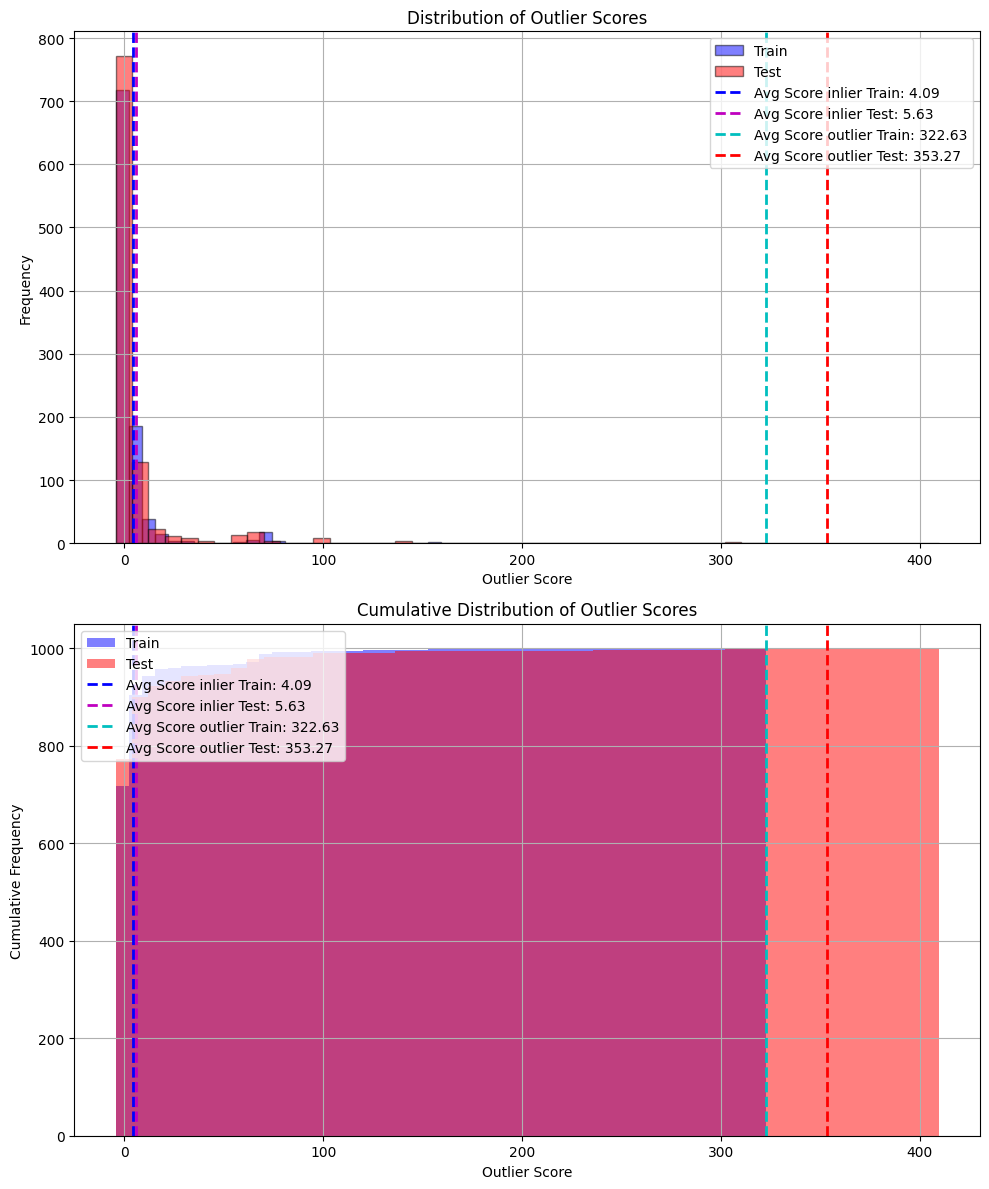

In [7]:
import matplotlib.pyplot as plt

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting the histogram of outlier scores for train and test sets
ax1.hist(scores_train, bins=50, alpha=0.5, color='blue', edgecolor='black', label='Train')
ax1.hist(scores_test, bins=50, alpha=0.5, color='red', edgecolor='black', label='Test')

ax1.axvline(average_score_inlier_train, color='b', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Train: {average_score_inlier_train:.2f}')
ax1.axvline(average_score_inlier_test, color='m', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Test: {average_score_inlier_test:.2f}')
ax1.axvline(average_score_outlier_train, color='c', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Train: {average_score_outlier_train:.2f}')
ax1.axvline(average_score_outlier_test, color='r', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Test: {average_score_outlier_test:.2f}')

ax1.set_title('Distribution of Outlier Scores')
ax1.set_xlabel('Outlier Score')
ax1.set_ylabel('Frequency')
ax1.legend(loc='upper right')
ax1.grid(True)

# Plotting the cumulative histogram of outlier scores for train and test sets
ax2.hist(scores_train, bins=50, alpha=0.5, color='blue', edgecolor=None, label='Train', cumulative=True)
ax2.hist(scores_test, bins=50, alpha=0.5, color='red', edgecolor=None, label='Test', cumulative=True)

ax2.axvline(average_score_inlier_train, color='b',  linestyle='dashed', linewidth=2, label=f'Avg Score inlier Train: {average_score_inlier_train:.2f}')
ax2.axvline(average_score_inlier_test, color='m',  linestyle='dashed', linewidth=2, label=f'Avg Score inlier Test: {average_score_inlier_test:.2f}')
ax2.axvline(average_score_outlier_train, color='c', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Train: {average_score_outlier_train:.2f}')
ax2.axvline(average_score_outlier_test, color='r',  linestyle='dashed', linewidth=2, label=f'Avg Score outlier Test: {average_score_outlier_test:.2f}')

ax2.set_title('Cumulative Distribution of Outlier Scores')
ax2.set_xlabel('Outlier Score')
ax2.set_ylabel('Cumulative Frequency')
ax2.legend(loc='upper left')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


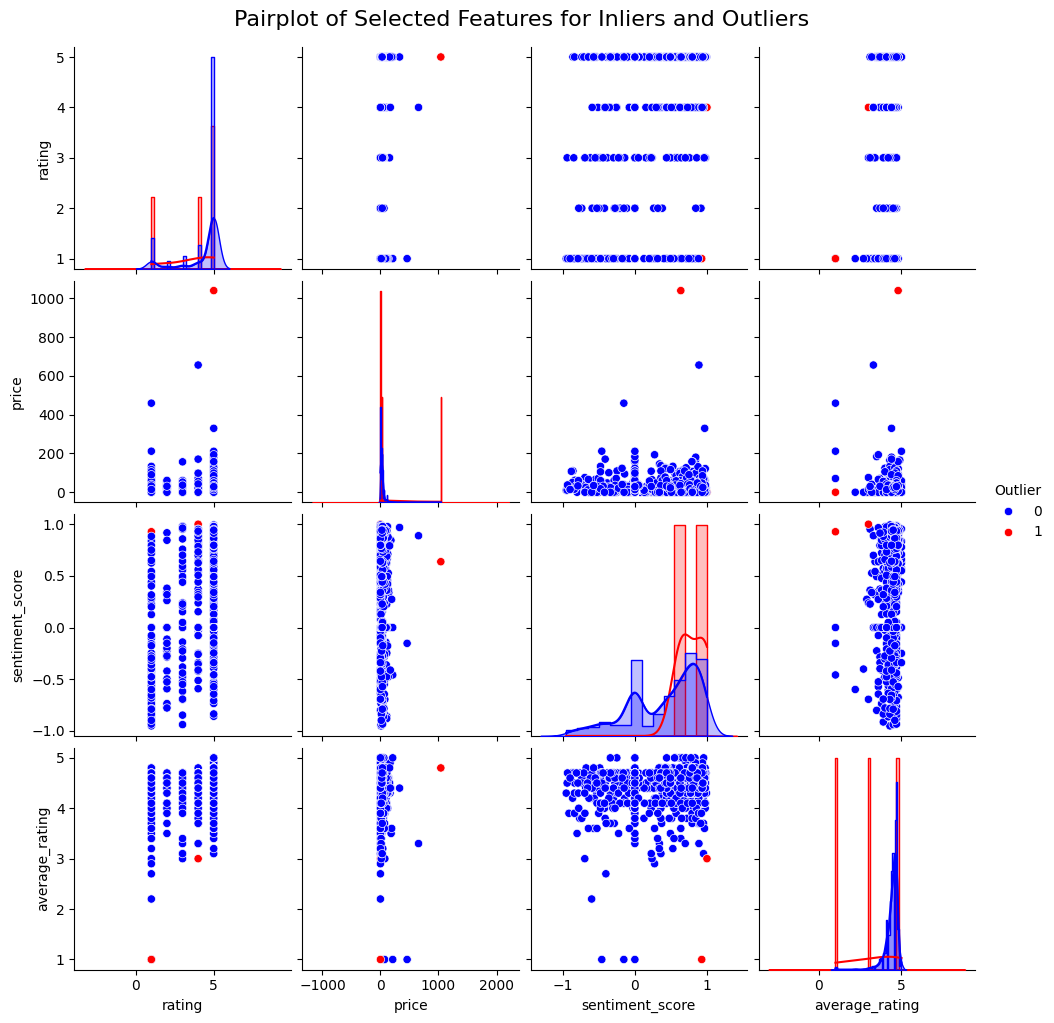

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting
df_visu = pd.DataFrame()
df_visu['scores_test'] = scores_test
df_visu['Outlier'] = outliers_test

# Include relevant columns from test_df_enriched
cols_of_interest = ['rating', 'price', 'sentiment_score', 'average_rating']
for col in cols_of_interest:
    df_visu[col] = test_df_enriched[col].reset_index(drop=True)

# Plot the pairplot to visualize feature distributions and pairwise relationships
g = sns.pairplot(df_visu, hue='Outlier', diag_kind='kde', palette={False: 'blue', True: 'red'}, vars=cols_of_interest)

# Map the diagonal to use histplot with kde and density normalization
g.map_diag(sns.histplot, kde=True, element='step', stat='density', common_norm=False)

# Set titles and adjust layout
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.set_title(ax.get_title(), fontsize=12)

# Adjust the title of the entire plot
plt.suptitle('Pairplot of Selected Features for Inliers and Outliers', y=1.02, fontsize=16)

# Show the plot
plt.show()


In [11]:
from src.tasks.data_drift import data_drift_scoring
ks_score_train = data_drift_scoring(scores_train, train_scores_outliers, method='ks')
ks_score_test = data_drift_scoring(scores_train, test_scores_outliers, method='ks')

psi_score_train = data_drift_scoring(scores_train, train_scores_outliers, method='psi')
psi_score_test = data_drift_scoring(scores_train, test_scores_outliers, method='psi')

print(f'KS Score - Train: {ks_score_train:.2f}, Test: {ks_score_test:.2f}, (higher is more different)')
print(f'PSI Score - Train: {psi_score_train:.2f}, Test: {psi_score_test:.2f}, (higher is more different)')

2024-08-07 16:55:42,265 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-07 16:55:42,269 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-07 16:55:42,272 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-07 16:55:42,276 - src.config - DEBUG - calling distribution_shift_scoring


KS Score - Train: 1.00, Test: 1.00, (higher is more different)
PSI Score - Train: 20.72, Test: 18.03, (higher is more different)


# Exploring outliers

In [12]:
# add the score to the dataframe and sort it
test_df_enriched["scores"] = scores_test
test_df_sorted = test_df_enriched.sort_values(by='scores', ascending=False)

col_to_display = [
    "rating",
    "average_rating",
    "sentiment_score",
    "similarity_good",
    "similarity_bad",
    "similarity_expensive",
    "similarity_scam",
    "similarity_error",
    "text_review",
    "text_metadata",
    "hour",
    "helpful_vote",
    "price",
    "length_char",
    "interaction_score",
    "readability",
    ]

# show top rows
display(test_df_sorted[col_to_display].head(5))
print(test_df_sorted[col_to_display].head(5))


,rating,average_rating,sentiment_score,similarity_good,similarity_bad,similarity_expensive,similarity_scam,similarity_error,text_review,text_metadata,hour,helpful_vote,price,length_char,interaction_score,readability
417,1,1.0,0.9270,0.081377,0.044389,-0.022750,0.010423,0.079569,Now if you are in the same situation I am in here is what I have found out and recommend. ----- problem history and details ----/n/nAlright I get to leave the first review to tell everyone how muc...,"WHIRLPOOL GIDDS-53-8725 3.5 cu. Ft Top Load Washing Machine, White, 9 Wash Cycles/n/n/n/n",21,60,-1.00,2320,0.380198,0.7246
539,5,4.8,0.6369,0.273194,0.243086,0.117791,0.082644,0.060917,Beautiful/n/nI love how it makes my kitchen looks and it is full of power and lites,Proline PLJW 102 4 Speed Wall/Under Cabinet Range Hood - 1000 Max CFM Blower - Stainless Professional Baffle Filrters Dishwasher Safe - 3 Year Warranty - Sizes include 30 36 42 and 48 Inch/n/n/n/n,15,0,1039.99,83,0.171707,0.8908
295,4,3.0,0.9996,0.135029,0.213257,0.151703,0.123793,0.144296,"Glad I Bought It/n/nI'm copying and pasting the review I used at Home Depot, because that is where I bought this compactor. However, I spent a lot of time on this review, and I love buying stuff o...","Broan 15"" Trash Compactor - Stainless Steel Door 15SS/n/n/n/n",19,34,-1.00,6255,0.401239,0.8173
869,5,4.7,0.6642,0.307617,0.419882,0.210699,0.356522,0.368077,"thanks you for make this transaction so easy./n/nI can't believe the quality of this product compared with &#34;name brand&#34; that cost $60 for only one, and this 3 packs cost less money than th...","AQUA CREST UKF8001 Replacement for EveryDrop Filter 4, Whirlpool EDR4RXD1, 4396395, Maytag UKF8001P, UKF8001AXX-750, Puriclean II, 46-9006, Refrigerator Water Filter (Pack of 3)/n/n/n/n",22,44,23.99,419,0.327618,0.7178
922,4,3.3,0.8884,0.052090,0.238829,0.126105,0.083999,-0.050784,"Xtreem ultra Ul02 30""/n/nVery nice And Stylish Looking , the grills are very difficult to remove, had to remove front cover to access bulbs and to take grill filters out , instructions Included ar...","XtremeAir Ultra Series UL02-W36, 36"" wide, LED lights, Baffle Filters W/Grease Drain Tunnel, 1.0mm Non-Magnetic Stainless Steel Seamless Body, Wall Mount Range Hood/n/n/n/n",21,3,655.74,527,0.600971,-0.0262


     rating  average_rating  sentiment_score  similarity_good  similarity_bad  similarity_expensive  similarity_scam  similarity_error                                                                                                                                                                                              text_review                                                                                                                                                                                         text_metadata  hour  helpful_vote    price  length_char  interaction_score  readability
417       1             1.0           0.9270         0.081377        0.044389             -0.022750         0.010423          0.079569  Now if you are in the same situation I am in here is what I have found out and recommend. ----- problem history and details ----/n/nAlright I get to leave the first review to tell everyone how muc...                                                         

In [14]:
# top rows with discrepency in sentiment analysis and rating
df_too_high_rating = test_df_sorted[(test_df_sorted["rating"] >= 4) & (test_df_sorted["sentiment_score"] < 0.5)]
display(df_too_high_rating[col_to_display].head(20))

,rating,average_rating,sentiment_score,similarity_good,similarity_bad,similarity_expensive,similarity_scam,similarity_error,text_review,text_metadata,hour,helpful_vote,price,length_char,interaction_score,readability
729,5,4.7,0.0000,0.111648,0.162114,0.005065,0.115779,0.014586,Exelwnte/n/nExelwnte,"SAMSUNG Genuine Filters for Refrigerator Water and Ice, Carbon Block Filtration for Clean, Clear Drinking Water, DA29-00020B-3P, 3 Pack/n/n/n/n",23,0,109.00,20,-0.018962,-3.8639
840,5,4.7,0.3612,0.038406,0.066051,0.077774,-0.008505,-0.037777,"water filter/n/nOriginal product for refrigerator.<br />Price is high, seems that it could be a little more inexpensive.<br />yes would recommend this product.","SAMSUNG Genuine Filters for Refrigerator Water and Ice, Carbon Block Filtration for Clean, Clear Drinking Water, DA29-00020B-3P, 3 Pack/n/n/n/n",22,0,109.00,159,0.561351,0.3869
230,5,4.7,-0.8589,0.104872,0.207160,0.043329,0.061885,0.165268,"Wrong Filter/n/nCame fast, intact and as pictured. Not sure how it works though because it doesn't fit our fridge. I didn't want to give it lower stars because of user error.","SAMSUNG Genuine Filters for Refrigerator Water and Ice, Carbon Block Filtration for Clean, Clear Drinking Water, DA29-00020B-3P, 3 Pack/n/n/n/n",19,0,109.00,176,0.486150,0.7794
942,5,4.7,0.0000,0.297466,0.221910,0.086027,0.099847,0.097502,Good/n/nGood,"SAMSUNG Genuine Filters for Refrigerator Water and Ice, Carbon Block Filtration for Clean, Clear Drinking Water, DA29-00020B-3P, 3 Pack/n/n/n/n",13,0,109.00,12,0.135238,0.3662
303,5,4.7,0.0000,0.135867,0.192023,0.051658,0.188143,0.073199,Five Stars/n/nFine,"SAMSUNG Genuine Filters for Refrigerator Water and Ice, Carbon Block Filtration for Clean, Clear Drinking Water, DA29-00020B-3P, 3 Pack/n/n/n/n",9,0,109.00,18,0.138128,0.7791
257,5,4.7,0.4404,0.432984,0.341403,0.296122,0.250742,0.122719,Good product for your money/n/nEasy to install,"Filterlogic UKF8001 Replacement for EveryDrop Filter 4, Whirlpool EDR4RXD1, Maytag 4396395, UKF8001AXX-200, UKF8001AXX-750, 46-9006, Puriclean II, FMM-2, FL-RF07, Refrigerator Water Filter, Pack o...",0,0,27.99,46,0.074988,0.6437
441,4,4.7,0.0000,0.318187,0.325479,0.322079,0.235112,0.100224,Good/n/nEasy to install and comparable price.,"Filterlogic UKF8001 Replacement for EveryDrop Filter 4, Whirlpool EDR4RXD1, Maytag 4396395, UKF8001AXX-200, UKF8001AXX-750, 46-9006, Puriclean II, FMM-2, FL-RF07, Refrigerator Water Filter, Pack o...",18,0,27.99,45,0.059103,0.5693
261,5,4.7,0.4215,0.092594,0.077486,0.099055,-0.046417,0.064336,Refrigerator filter/n/nIt was easy to install and seems to be working as advertised. No leaking after I installed it as well.,"Filterlogic UKF8001 Replacement for EveryDrop Filter 4, Whirlpool EDR4RXD1, Maytag 4396395, UKF8001AXX-200, UKF8001AXX-750, 46-9006, Puriclean II, FMM-2, FL-RF07, Refrigerator Water Filter, Pack o...",5,0,27.99,125,0.488884,0.6082
999,5,4.7,0.0000,0.097003,0.122588,0.120122,0.197639,0.105682,Was what I needed/n/nValue for the money,"Filterlogic UKF8001 Replacement for EveryDrop Filter 4, Whirlpool EDR4RXD1, Maytag 4396395, UKF8001AXX-200, UKF8001AXX-750, 46-9006, Puriclean II, FMM-2, FL-RF07, Refrigerator Water Filter, Pack o...",9,0,27.99,40,0.089641,0.8129
413,4,4.7,0.0000,0.314999,0.272928,0.177610,0.219119,0.191004,Great/n/nJust what I ordered,"Filterlogic UKF8001 Replacement for EveryDrop Filter 4, Whirlpool EDR4RXD1, Maytag 4396395, UKF8001AXX-200, UKF8001AXX-750, 46-9006, Puriclean II, FMM-2, FL-RF07, Refrigerator Water Filter, Pack o...",2,0,27.99,28,0.187936,0.9280


In [ ]:
df_too_low_rating = test_df_sorted[(test_df_sorted["rating"] < 3) & (test_df_sorted["sentiment_score"] > 0.5)]
display(df_too_low_rating[col_to_display].head(5))

,rating,average_rating,sentiment_score,similarity_good,similarity_bad,similarity_expensive,similarity_scam,similarity_error,text_review,text_metadata,hour,helpful_vote,price,length_char,interaction_score,readability
1147,1,4.8,0.5837,0.113505,0.183616,0.106053,0.288690,0.346771,"Terrible/n/nI tried to use the card to purchase something on Amazon and it didn't work Also, if you use it somewhere else the card has to be activated before you use it! It appears that you won't...",Visa $25 Gift Card (plus $3.95 Purchase Fee)/n/n/n/n,4,152,28.95,279,0.438307,0.7859
14756,1,4.6,0.6988,0.070332,0.101796,0.200176,0.267648,0.077780,"Limited use./n/nIt may have been an oversight on my part, but this card is NOT universally accepted. For online purchases (where my intention of using it originated) It was rejected a couple of ti...",$200 Mastercard Gift Card (plus $6.95 Purchase Fee)/n/n/n/n,11,44,206.95,535,0.664616,0.8193
20442,1,3.5,0.9542,0.137594,0.165611,0.059950,0.222202,0.307266,"Deceiving/n/nThere should never be fine print that you have to read when buying a gift card. This came hand-taped onto the the cardboard display, so since it looked fishy, I went online to read re...",Taco Time Gift Card/n/n/n/n,2,0,25.00,787,0.596247,0.8958
31,1,4.8,0.7184,0.124143,0.147500,0.142213,0.248157,0.343595,Gift Card Empty/n/nI purchased this $100.00 gift card on December 14 2019 and yesterday April 26 2010 My wife scratched the pin and she was unable to used it the card is empty we called Kohls and ...,Kohl's Gift Card/n/n/n/n,21,0,125.00,326,0.642018,0.6590
18487,1,4.8,0.9870,0.094591,0.033352,0.088345,0.129007,0.148938,"They want our money, but.../n/nI purchased several gift cards last year, with greeting cards that had messages suitable to various recipients. Many of my family members are Christians, who apprec...",Amazon.com Gift Card in a Greeting Card (Various Designs)/n/n/n/n,4,9,-1.00,1061,0.476276,0.6390
